In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import minmax_scaling
import datetime
import chardet

In [7]:
root_path = "/Volumes/Data/Professionnel/DataScienceProjects/RProject"
nfl = pd.read_csv(root_path + "/NFL/NFL_2009_2017.csv")

<ipython-input-7-19ed057f43b9>:2: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl = pd.read_csv(root_path + "/NFL/NFL_2009_2017.csv")


In [8]:
nfl.iloc[:]

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,NaN,00:28,1,28.0,4.0,BAL,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2017
407684,2017-12-31,2017123101,29,4,3.0,00:28,1,28.0,0.0,BAL,...,-0.397515,0.080409,0.919591,0.050478,0.949522,0.080409,-0.029931,-0.021795,-0.008136,2017
407685,2017-12-31,2017123101,29,4,4.0,00:24,1,24.0,4.0,BAL,...,2.457114,0.050478,0.949522,0.030881,0.969119,0.050478,-0.019597,-0.030603,0.011006,2017
407686,2017-12-31,2017123101,30,4,1.0,00:14,1,14.0,10.0,BAL,...,NaN,0.030881,0.969119,0.000000,1.000000,0.969119,0.030881,NaN,NaN,2017


##### How Many missing data point do we have ? the following fonction count the number of missing value per columns

In [4]:
nfl.shape # the shape of the data

(407688, 102)

In [5]:
missing_values_count = nfl.isnull().sum()
missing_values_count

Date             0
GameID           0
Drive            0
qtr              0
down         61154
             ...  
Win_Prob     25009
WPA           5541
airWPA      248501
yacWPA      248762
Season           0
Length: 102, dtype: int64

##### we can see that there is a lot of missing data. it will be good to see what is the percentage of missing data in our data set

In [6]:
total_cell = np.product(nfl.shape)
total_missing_value = missing_values_count.sum()
percentage_missing_value = (total_missing_value/total_cell)*100
print(percentage_missing_value)

24.87214126835169


### Figure out why some data are missing?

###### it is important to figure out why some data are missing and how it can affecte your analysis. here you need to have intution. One important question you can ask to help you make an effectif analysis is: Why some data are missing? Is because its wasn't  record or its doesn't exit? it the data does not exit( like the age of the oldest child of someone who doesn't have child), it will make sens that the value do not exit and you can't try to guess it. But in the orher hand if the value doesn't exist becaus it wasn't record, you must try to get what it might have been base on the value of other columns and row. This is call imputation.

In [7]:
missing_values_count[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

### Drop Missing values

###### if you don't have any reason to figure the missing values you can drop theme. But note for important project it is not recommanded

In [8]:
# this function will drop axis that containe at least a missing value. by default the axis is row
nfl.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


###### we see that it drop all the data because every row contain at least on missing values. We can reverse the axis it taking account. Now we remove column that contain at least one missing value

In [9]:
columns_with_na_dropped = nfl.dropna(axis=1)
columns_with_na_dropped

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,0,None,3,3,3,3,3,0.0,0.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407683,2017-12-31,2017123101,29,4,1,0,-4,1,0,0,...,1,BAL,0,3,0,2,0,0.0,0.0,2017
407684,2017-12-31,2017123101,29,4,1,14,-4,1,0,0,...,0,None,2,2,0,2,0,0.0,0.0,2017
407685,2017-12-31,2017123101,29,4,1,14,9,1,13,0,...,0,None,2,2,0,2,0,0.0,0.0,2017
407686,2017-12-31,2017123101,30,4,1,10,-1,1,-1,0,...,0,None,0,2,0,2,0,0.0,0.0,2017


##### we see that columns that contain missing value were dropped. we can verifie it

In [10]:
print("Number of columns in the original data {0}".format(nfl.shape[1]))
print("Number of columns it the na columns dropped {0}".format(columns_with_na_dropped.shape[1]))

Number of columns in the original data 102
Number of columns it the na columns dropped 41


###### there is an important number of data which were dropped, among 102 only 41 we have.

## Filling with missing value automaticaly

In [11]:
subset_nfl_data = nfl.loc[:,'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


###### We just restric the number of columns. we select all columns between 'EPA' and 'Season'. now that we have a view in all columns we can fill missing value on every column with the fillna function

In [12]:
subset_nfl_data.fillna(0) # here we fill with 0 value

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


##### we can also want to fill the missing value value we just the value just precede the value i the same clumns

In [13]:
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


## Scaling and Normalisation

###### sometime scaling and normalisation are use interchangely but the are different, both transform an original data but does not change anything about importante proprite of it. Scaling focus on the range of the data while normalisation focus on the shape of the data.

### Scaling data

Text(0.5, 1.0, 'Scale Data')

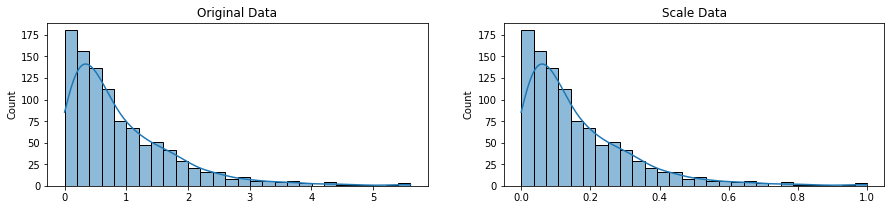

In [14]:
original_data = np.random.exponential(size=1000)
scaling = minmax_scaling(original_data, columns=[0])
fig, ax = plt.subplots(1,2, figsize = (15,3))
sns.histplot(original_data,ax = ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaling, ax = ax[1], kde=True, legend=False)
ax[1].set_title("Scale Data")

###### Here we see that in these two plot, the shape of the hsit stay the same. what scaling does is just change the range of the data from [0,8] to [0,1]

#### Normalisation

###### The normalization deal with observation while scaling with the range. The goal of normalization is to transform the data in order to be describe as normal distibution. normalization is use when we trait with ML or staitistic which required the data to be normalize. There is many technic to normalize data, one we use here is call box-cox. 

Text(0.5, 1.0, 'Normalized Data')

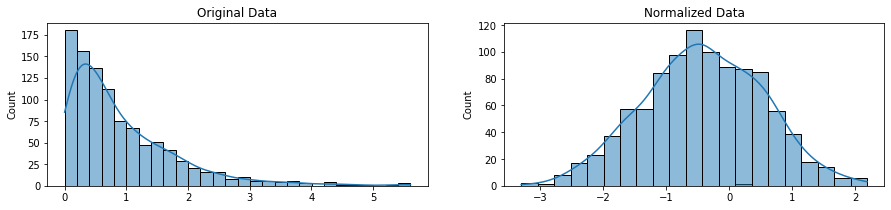

In [15]:
normalized_data = stats.boxcox(original_data)
fig, ax = plt.subplots(1,2, figsize = (15,3))
sns.histplot(original_data,ax = ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax = ax[1], kde=True, legend=False)
ax[1].set_title("Normalized Data")

###### here is the result. now our data data have a bell shap, gaussian distribution

#### Parsing Date

In [9]:
landslid = pd.read_csv(root_path + "/NFL/catalog.csv")
landslid.iloc[:10]


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
5,64,4/20/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,0.23715,...,"(37.481400000000001, -82.518600000000006)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Applalachain news-express,http://www.news-expressky.com/articles/2007/04...
6,67,4/24/07,NaN,NaN,United States,US,South Dakota,2540,Dakota Dunes,2.48033,...,"(42.494100000000003, -96.457599999999999)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Sioux City Journnal,http://www.siouxcityjournal.com/articles/2007/...
7,77,5/21/07,NaN,SA,Colombia,CO,Risaralda,440118,Pereira,0.62022,...,"(4.8080999999999996, -75.694100000000006)",Landslide,Mudslide,Large,Rain,NaN,NaN,13.0,Reuters - AlertNet.org,http://www.reuters.com/news/video/videoStory?v...
8,105,6/27/07,NaN,SA,Ecuador,EC,Zamora-Chinchipe,15276,Zamora,0.47714,...,"(-4.0650000000000004, -78.950999999999993)",Landslide,Landslide,Medium,Downpour,NaN,NaN,NaN,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...
9,106,6/27/07,NaN,SA,Ecuador,EC,Loja,117796,Loja,0.35649,...,"(-3.99, -79.204999999999998)",Landslide,Landslide,Medium,Downpour,NaN,NaN,NaN,Red Cross - Field reports,https://www-secure.ifrc.org/dmis/prepare/view_...


In [22]:
print(landslid.shape)

(1693, 23)


In [23]:
landslid.date

0        3/2/07
1       3/22/07
2        4/6/07
3       4/14/07
4       4/15/07
         ...   
1688    12/7/15
1689    2/22/16
1690    2/23/16
1691    2/26/16
1692     3/2/16
Name: date, Length: 1693, dtype: object

###### if we look carefully the second columns, we can note that date are record, humain ca easily recognize it. but what about python? python also has it own format of date, in the last row we see that python does not recognized it as date object, but object type. so we need to coverte it in order that python know it.

In [27]:
landslid['date_parsing'] = pd.to_datetime(landslid["date"], format="%m/%d/%y")


###### Now some look on it.

In [28]:
landslid.loc[:10,["date", "date_parsing"]]

,date,date_parsing
0,3/2/07,2007-03-02
1,3/22/07,2007-03-22
2,4/6/07,2007-04-06
3,4/14/07,2007-04-14
4,4/15/07,2007-04-15
5,4/20/07,2007-04-20
6,4/24/07,2007-04-24
7,5/21/07,2007-05-21
8,6/27/07,2007-06-27
9,6/27/07,2007-06-27


###### here we are it is converte

##### sometime we run in data that have multiple date format in a columns. we can fix it but in this way. pandas just infer the it. But it is not recommended to do so, sometime it take time that specify the format. pandas also don't be able always to infer the date

In [29]:
landslid["date_parese"] = pd.to_datetime(landslid["date"], infer_datetime_format=True)

In [36]:
## we can extract information on this date format.
day_of_month = landslid["date_parsing"].dt.day
day_of_month[:12]

0      2.0
1     22.0
2      6.0
3     14.0
4     15.0
5     20.0
6     24.0
7     21.0
8     27.0
9     27.0
10    27.0
11     1.0
Name: date_parsing, dtype: float64

#### Plot the day of a month

In [37]:
day_of_month = day_of_month.dropna()

<AxesSubplot:xlabel='date_parsing', ylabel='Count'>

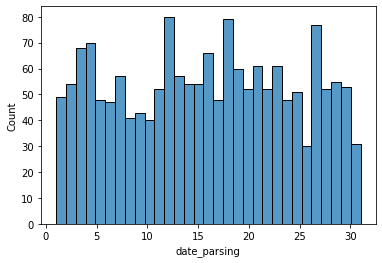

In [41]:
sns.histplot(day_of_month, kde=False, bins= 31)